In [ ]:
import pandas as pd
import matplotlib as plt
import sqlite3
import os
import seaborn as sns

In [ ]:
#retriing table names from data frame
im_path = r"C:\Users\HP\Desktop\moringa\PHASE1_PROJECT\im.db\im.db"

conn = sqlite3.connect(im_path)
cursor = conn.cursor()

table_name_query = """ SELECT name
                       AS 'Table Names' 
                       FROM sqlite_master 
                       WHERE type='table';
                       """

table_names = pd.read_sql(table_name_query, conn)

print(table_names)

In [ ]:
q = """SELECT *
       FROM directors;
    """
df = pd.read_sql(q, conn)

print(df.head())

In [ ]:
# marging the movie mudgets in csv file and  cleaning them up
budget_one = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
budget_two = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\bom.movie_gross.csv\\bom.movie_gross.csv")


In [ ]:
budget_one.head()
budget_one.tail()

In [ ]:
print(budget_one.columns)

In [ ]:
budget_one

In [ ]:
print(budget_two.columns)

In [ ]:
budget_two.drop(columns=["studio", "year"], inplace=True)
budget_two

In [ ]:
budget_two.columns = ['movie', 'domestic_gross', 'worldwide_gross']

# Print the updated DataFrame
print(budget_two)

In [ ]:
merged_revenue=pd.concat([budget_one, budget_two])
merged_revenue

In [ ]:
merged_revenue.drop_duplicates()

In [ ]:
merged_revenue['domestic_gross'] = pd.to_numeric(merged_revenue['domestic_gross'], errors='coerce')


In [ ]:
merged_revenue['domestic_gross'].mean()

In [ ]:
median_value=merged_revenue['domestic_gross'].median()
median_value

In [ ]:
merged_revenue['domestic_gross'].max()

In [ ]:
merged_revenue['domestic_gross'].describe()

In [ ]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].fillna(median_value)

In [ ]:
merged_revenue['worldwide_gross'].describe()

In [ ]:
# im trying to remove the /$ signs 
merged_revenue['worldwide_gross'] = pd.to_numeric(merged_revenue['worldwide_gross'].replace('[\$,]', '', regex=True), errors='coerce')


In [ ]:
median=merged_revenue['worldwide_gross'].median()

In [ ]:
merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].fillna(median)

In [ ]:
merged_revenue['worldwide_gross'].describe()

In [ ]:
m1 = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
m1

In [ ]:

production_budget = m1['production_budget']

production_budget = pd.to_numeric(production_budget.replace('[\$,]', '', regex=True), errors='coerce')
production_budget

In [ ]:
Release_year = m1['release_date']
Release_year

In [ ]:
merged_revenue['Release_year'] = Release_year

In [ ]:
production_budget.describe()

In [ ]:
merged_revenue
pd.set_option('display.float_format', '{:.2f}'.format)
merged_revenue

In [ ]:
merged_revenue['production_budget'] = production_budget
merged_revenue

In [ ]:
merged_revenue['production_budget'].describe()

In [ ]:
merged_revenue['production_budget'] = pd.to_numeric(merged_revenue['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')

In [ ]:
median_production=merged_revenue['production_budget'].median()

In [ ]:
merged_revenue['production_budget'] = merged_revenue['production_budget'].fillna(median_production)

In [ ]:
merged_revenue['Total_revenue'] = merged_revenue['domestic_gross'] + merged_revenue['worldwide_gross']
merged_revenue['Total_revenue'] 

In [ ]:
merged_revenue['ROI'] = ((merged_revenue['Total_revenue'] - merged_revenue['production_budget']) / merged_revenue['production_budget']) * 100
merged_revenue['ROI']

In [ ]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].round().astype(int)

merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].round().astype(int)

In [ ]:
merged_revenue

In [ ]:
import matplotlib.pyplot as plt

# Check if 'figure' is overwritten
print(plt.figure)

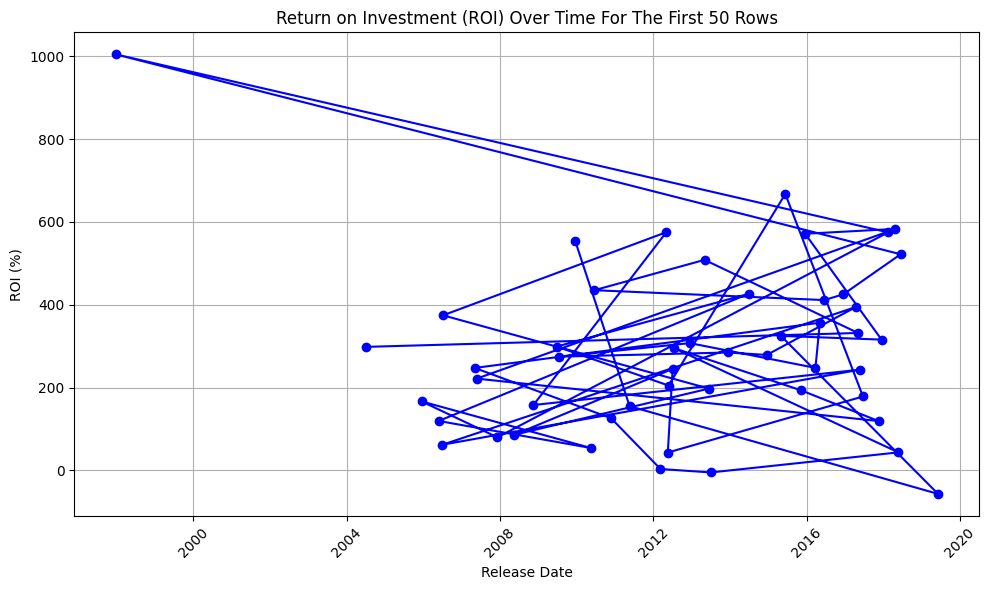

In [218]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

merged_revenue['release_date']= pd.to_datetime(merged_revenue['release_date'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.plot(merged_revenue['release_date'].head(50), merged_revenue['ROI'].head(50), marker='o', linestyle='-', color='b')
plt.title('Return on Investment (ROI) Over Time For The First 50 Rows')
plt.xlabel('Release Date')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


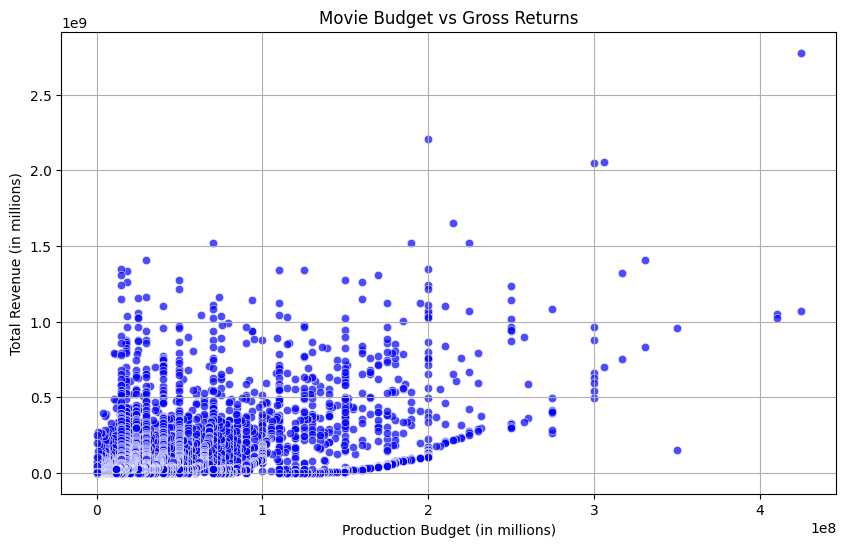

In [208]:
# trying to figure out the corelationship between movie budget and total revenue returns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Total_revenue', data=merged_revenue, color='blue', alpha=0.7)
plt.title('Movie Budget vs Gross Returns')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Total Revenue (in millions)')
plt.grid(True)
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


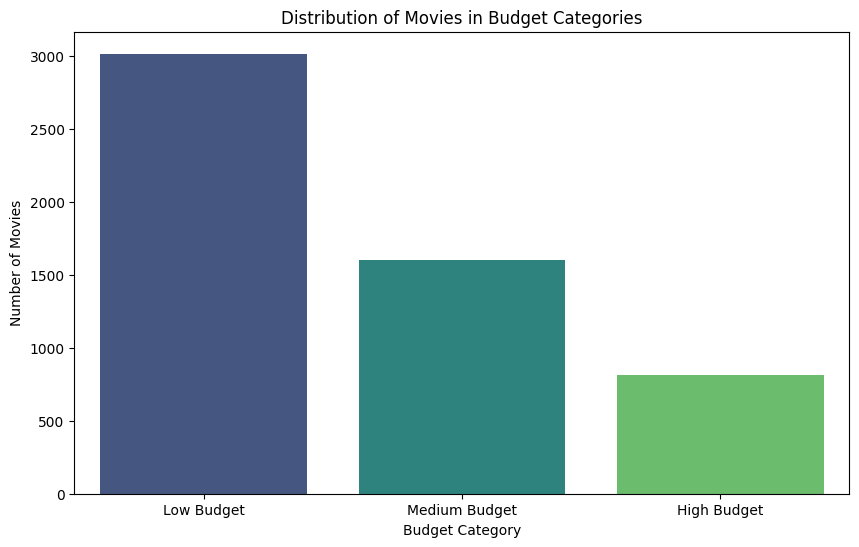

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


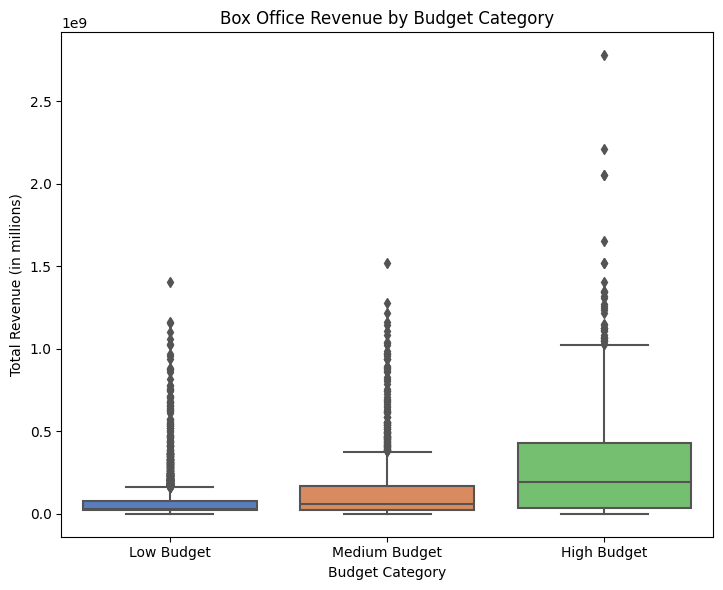

In [209]:
#  budget categories by definations
budget_bins = [20000000, 50000000, 100000000, float('inf')]  
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget']

# Created a new column 'Budget_Category' based on budget ranges
merged_revenue['Budget_Category'] = pd.cut(merged_revenue['production_budget'], bins=budget_bins, labels=budget_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Budget_Category', data=merged_revenue, palette='viridis')
plt.title('Distribution of Movies in Budget Categories')
plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')
plt.show()

# analysis on revenue and reviews by budget category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Budget_Category', y='Total_revenue', data=merged_revenue, palette='muted')
plt.title('Box Office Revenue by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Total Revenue (in millions)')

plt.tight_layout()
plt.show()

In [ ]:
top_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).head(10)
top_gross_return 


In [ ]:
low_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).tail(10)
low_gross_return

In [ ]:
# correlation between production cost and revenue return
correlation_budget_revenue = merged_revenue['production_budget'].corr(merged_revenue['Total_revenue'])
correlation_budget_revenue

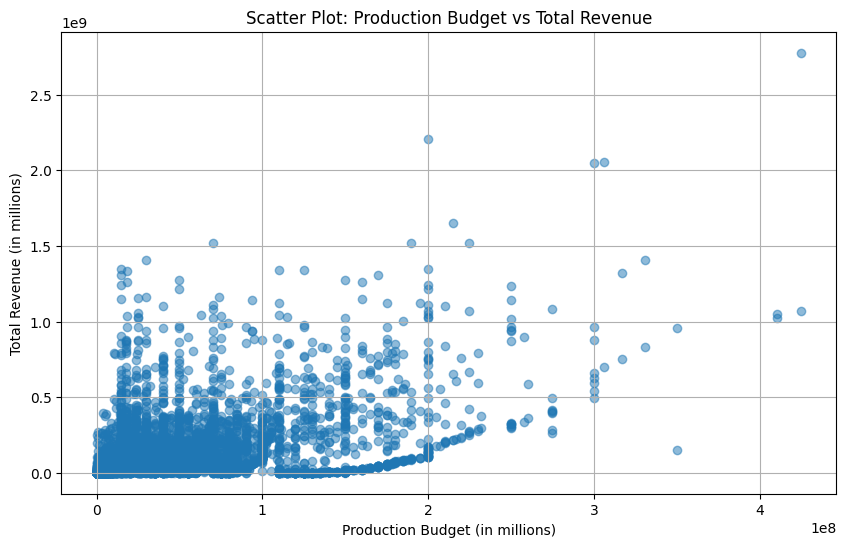

In [210]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_revenue['production_budget'], merged_revenue['Total_revenue'], alpha=0.5)
plt.title('Scatter Plot: Production Budget vs Total Revenue')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Total Revenue (in millions)')
plt.grid(True)
plt.show()

# positive correlation

In [ ]:
Basic_info = '''
                 SELECT * FROM movie_basics;
'''

cursor.execute(Basic_info)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
Movies_release = '''
                 SELECT start_year, COUNT(*) AS movie_count
                 FROM movie_basics
                 GROUP BY start_year
                 ORDER BY start_year;
'''
cursor.execute(Movies_release)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
# executing sql queries on im.db
audience_Ratings_above_avg=''' 
                 SELECT *
                 FROM movie_ratings
                 WHERE averagerating >= 7.0;              
'''
cursor.execute(audience_Ratings_above_avg)

rows = cursor.fetchall()

for row in rows:
    print(row)


In [ ]:
geners_above_avg = '''
                 SELECT genres, AVG(averagerating) AS avg_rating
                 FROM movie_basics
                 JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
                 GROUP BY genres
                 HAVING avg_rating > 7.0;
'''

cursor.execute(geners_above_avg)

rows = cursor.fetchall()

for row in rows:
    print(row)



In [ ]:
Proffesions = '''
                 SELECT primary_name, primary_profession
                 FROM persons;
'''

cursor.execute(Proffesions)

rows = cursor.fetchall()

for row in rows:
    print(row)

In [ ]:
recognised_by = '''
                 SELECT persons.primary_name, known_for.movie_id
                 FROM persons
                 LEFT JOIN known_for ON persons.person_id = known_for.person_id;
'''

cursor.execute(recognised_by)

rows = cursor.fetchall()

for row in rows:
        print(row)


In [219]:
English_movies= '''
                  SELECT title, region, language
                 FROM movie_akas
                 WHERE language = "en";
'''

cursor.execute(English_movies)

rows = cursor.fetchall()

for row in rows:
     print(row)
 

('Miguelito', 'XWW', 'en')
('Miguelito', 'AU', 'en')
('Alice Dar Sarzamin E Ajayeb', 'IE', 'en')
('Alice in Wonderland', 'JP', 'en')
('Returning Home', 'XWW', 'en')
('The Universe in Which I Loved You', 'XWW', 'en')
('Young Clients', 'XWW', 'en')
('Black Buenos Aires', 'XWW', 'en')
('Prince Killian and the Holy Grail', 'CA', 'en')
('Room in Rome', 'XWW', 'en')
('Space Dogs 3D', 'XWW', 'en')
('Mind Game', 'JP', 'en')
('Chocolate Derringer', 'XWW', 'en')
('The Robot', 'XEU', 'en')
('Bullet', 'JP', 'en')
('1-800-LOVE', 'IN', 'en')
('The Pack', 'XWW', 'en')
('Close Enemy', 'XWW', 'en')
('Judge Dredd', 'JP', 'en')
('Judge Dredd', 'JM', 'en')
("Turk's Head", 'XWW', 'en')
('Unknown', 'CA', 'en')
('The Little Room', 'XWW', 'en')
('The Little Bedroom', 'XWW', 'en')
('Happy Feet 2', 'US', 'en')
('Beneath the Dark', 'US', 'en')
('Beneath the Dark', 'XWW', 'en')
('Pigeons on the Roof', 'XWW', 'en')
('Unlikely Revolutionaries', 'XWW', 'en')
('Abacus and Sword', 'XWW', 'en')
('Nostalgia for the Ligh

In [174]:
critics_file = r'C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\rt.reviews.tsv\\rt.reviews.tsv'

critics_reviews = pd.read_csv(critics_file, sep='\t', encoding='latin-1')

critics_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [175]:
movies_info_file = r"C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\rt.movie_info.tsv\\rt.movie_info.tsv"

movies_info = pd.read_csv(movies_info_file, sep='\t', encoding='latin-1')

movies_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [176]:
movies_info.drop(columns=['synopsis', 'theater_date',	'dvd_date', 'currency', 'box_office'])

,id,rating,genre,director,writer,runtime,studio
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,104 minutes,NaN
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes,Entertainment One
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,116 minutes,NaN
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,128 minutes,NaN
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,200 minutes,NaN
...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,106 minutes,New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,88 minutes,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,111 minutes,NaN
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,101 minutes,NaN


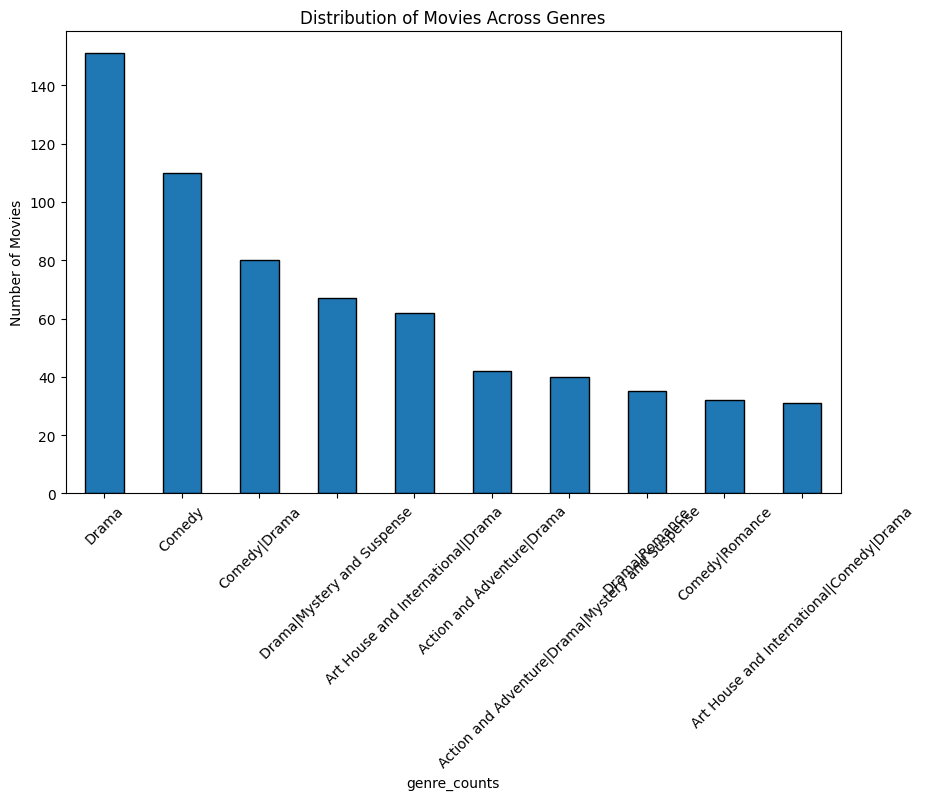

In [203]:
genre_counts = movies_info['genre'].value_counts()
genre_counts.head(10)

genre_counts.head(10).plot(kind='bar', edgecolor='black', rot=45, figsize=(10, 6))
plt.title('Distribution of Movies Across Genres')
plt.xlabel('genre_counts')
plt.ylabel('Number of Movies')
plt.show()

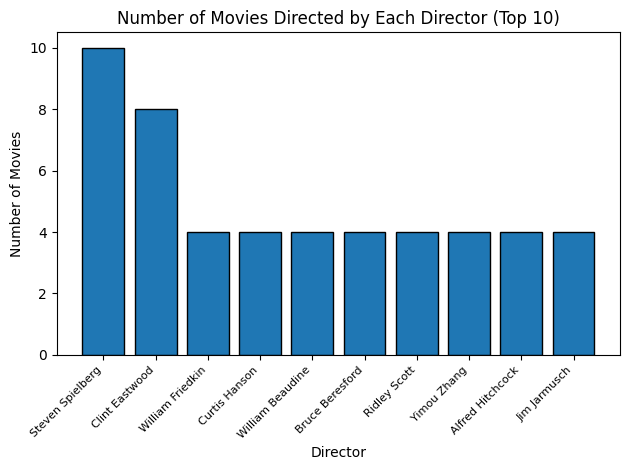

In [216]:
directors_counts = movies_info['director'].value_counts()
directors_counts.head(10)

plt.bar(directors_counts.index[:10], directors_counts.head(10).values, edgecolor='black', width=0.8)
plt.title('Number of Movies Directed by Each Director (Top 10)')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
writers_count=movies_info['writer'].value_counts()
writers_count

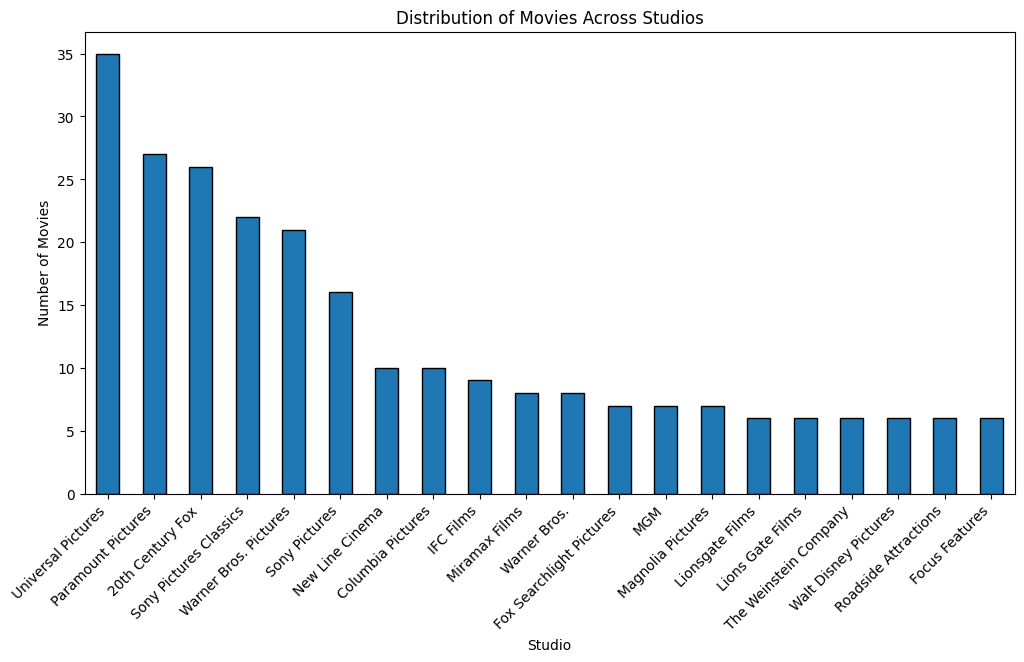

In [201]:
studios_count=movies_info['studio'].value_counts()
studios_count.head(20)

studios_count.head(20).plot(kind='bar', edgecolor='black', figsize=(12, 6))
plt.title('Distribution of Movies Across Studios')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [ ]:
movies_info['runtime'].describe()